<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL Security Data Analytics and Visualisation
## Portfolio Assignment: Part 2
### Academic year: 2024-25
## Conduct a security investigation to examine and classify different malware characteristics
---

For this task, the company **UWEtech** have enlisted your support as a security data analyst once again. They believe they have found malware on some of their workstations; however they do not know what malware it is. They also believe that some machines may be infected with different kinds of malware. They have asked you to identify what malware is running on each of the contaminated machines, so that they may understand more about how this incident has occurred on their corporate network.

**Dataset:** You will be issued a dataset for this task via GitLab: https://gitlab.uwe.ac.uk/a23-mccarthy/sdav-2024

**This exercise carries a weight of 30% towards your overall portfolio submission**

### Submission Documents
---

For Part 2 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART2.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for your portfolio submission is **THURSDAY 15th MAY @ 14:00**.


**Le Thanh Phuong Nam _ ID (HCMIU) : ITITWE19025 _ Student number (UWE): 23083609**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import os

# Create part2 directory
os.makedirs('./part2', exist_ok=True)

# Upload malware_data.csv file
print("Upload file malware_data.csv:")
uploaded = files.upload()
# Move file to part2 directory
for file_name in uploaded.keys():
    if file_name == 'malware_data.csv':
        os.rename(file_name, './part2/malware_data.csv')

# Upload malware_label.csv file
print("Upload file malware_label.csv:")
uploaded = files.upload()
# Move file to part2 directory
for file_name in uploaded.keys():
    if file_name == 'malware_label.csv':
        os.rename(file_name, './part2/malware_label.csv')

# Load the data
features = pd.read_csv('./part2/malware_data.csv', header=None)
features

Upload file malware_data.csv:


Saving malware_data.csv to malware_data.csv
Upload file malware_label.csv:


Saving malware_label.csv to malware_label.csv


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,224862.0,15842.0,12985.0,7387.0,13132.0,5112.0,8661.0,7990.0,14978.0,5656.0,...,3714.0,2892.0,9344.0,2415.0,2742.0,3023.0,11949.0,3662.0,5552.0,77433.0
1,21802.0,2127.0,2076.0,2028.0,1871.0,1622.0,1939.0,1502.0,2133.0,1689.0,...,1664.0,1607.0,1788.0,1394.0,1327.0,1453.0,1785.0,1559.0,1755.0,4882.0
2,24407.0,11682.0,7189.0,6538.0,7687.0,6848.0,4974.0,5377.0,7049.0,11642.0,...,5795.0,6053.0,6426.0,5435.0,4961.0,5026.0,5376.0,4180.0,5685.0,5775.0
3,7132.0,461.0,647.0,371.0,581.0,269.0,646.0,262.0,243.0,165.0,...,151.0,276.0,299.0,294.0,294.0,354.0,506.0,569.0,940.0,1516.0
4,5321.0,1108.0,985.0,955.0,958.0,890.0,971.0,919.0,945.0,963.0,...,933.0,975.0,945.0,924.0,879.0,952.0,956.0,900.0,942.0,1559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,23849.0,1489.0,1573.0,2649.0,1560.0,1025.0,922.0,1020.0,1042.0,938.0,...,993.0,968.0,1165.0,1041.0,1258.0,1753.0,1203.0,958.0,1315.0,4342.0
27996,9267.0,1056.0,981.0,930.0,1573.0,819.0,879.0,1064.0,1029.0,893.0,...,998.0,911.0,990.0,1039.0,930.0,833.0,904.0,891.0,976.0,2683.0
27997,25357.0,874.0,1008.0,2781.0,1518.0,939.0,4267.0,968.0,1103.0,1032.0,...,563.0,557.0,974.0,706.0,514.0,632.0,657.0,584.0,535.0,2431.0
27998,29010.0,6476.0,2969.0,5358.0,2827.0,4598.0,2172.0,4045.0,2496.0,3718.0,...,217.0,146.0,544.0,232.0,95.0,140.0,294.0,163.0,182.0,4005.0


In [10]:
labels = pd.read_csv('./part2/malware_label.csv', header=None)
labels = labels.drop(0, axis=1)
labels = labels.rename(columns = {1:'label'})
labels.value_counts()

,count
label,
bladabindi,2000
dealply,2000
emotet,2000
filetour,2000
flystudio,2000
gamarue,2000
gandcrab,2000
high,2000
razy,2000


In this dataset, we have collected data from 28000 systems (rows), where each system reports 256 parameters (columns).

We will first look at developing a small classifier "by hand", to help you understand how the classifier works, and then we will look at using the full dataset on more powerful classifiers to see whether we can classify the different malware varients on the set of workstations.

## Part 1: Developing a small classifier "by hand"

### Do not modify this cell

In [11]:
# DO NOT MODIFY THIS CELL
mal1_index = 17000
mal2_index = 21000
mal3_index = 12000
mal_range = 50
mal_test_range = 30

train_data = np.vstack([ features[mal1_index:mal1_index+mal_range][[0,1]].values, features[mal2_index:mal2_index+mal_range][[0,1]].values, features[mal3_index:mal3_index+mal_range][[0,1]].values ])
train_data = pd.DataFrame(train_data)
train_labels = np.vstack([ labels[mal1_index:mal1_index+mal_range].values, labels[mal2_index:mal2_index+mal_range].values, labels[mal3_index:mal3_index+mal_range].values ])
train_labels = pd.DataFrame(train_labels)
train_data['labels'] = train_labels
train_data = train_data.rename(columns={0:'x', 1:'y'})

test_data = np.vstack([ features[mal1_index+mal_range:mal1_index+mal_range+mal_test_range][[0,1]].values, features[mal2_index+mal_range:mal2_index+mal_range+mal_test_range][[0,1]].values, features[mal3_index+mal_range:mal3_index+mal_range+mal_test_range][[0,1]].values ])
test_data = pd.DataFrame(test_data)
test_labels = np.vstack([ labels[mal1_index+mal_range:mal1_index+mal_range+mal_test_range].values, labels[mal2_index+mal_range:mal2_index+mal_range+mal_test_range].values, labels[mal3_index+mal_range:mal3_index+mal_range+mal_test_range].values ])
test_labels = pd.DataFrame(test_labels)
test_data['labels'] = test_labels
test_data = test_data.rename(columns={0:'x', 1:'y'})

train_data

,x,y,labels
0,3114896.0,10815.0,wannacry
1,3436940.0,9551.0,wannacry
2,1812649.0,15343.0,wannacry
3,3067845.0,10541.0,wannacry
4,51591.0,21367.0,wannacry
...,...,...,...
145,78591.0,7734.0,razy
146,80429.0,5114.0,razy
147,2898.0,98.0,razy
148,183376.0,8477.0,razy


We now have a smaller sample of data to work with called train_data, that has three malware families included, and we have reduced the number of features to make it easier to understand the process of how the classifier operates.

### Question 1: Find the Centroid point of each of the three groups
#### (2 marks)

*Hint: We have filtered the sample to a new variable called **train_data**. Also, think about how to find the mid-point of a set of co-ordinate points **x** and **y**.*

In [15]:
# ANSWER

wannacry_centroid = []
razy_centroid = []
startsurf_centroid = []

# Filter data by label and calculate centroids
wannacry_data = train_data[train_data['labels'] == 'wannacry']
wannacry_centroid = [float(wannacry_data['x'].mean()), float(wannacry_data['y'].mean())]

razy_data = train_data[train_data['labels'] == 'razy']
razy_centroid = [float(razy_data['x'].mean()), float(razy_data['y'].mean())]

startsurf_data = train_data[train_data['labels'] == 'startsurf']
startsurf_centroid = [float(startsurf_data['x'].mean()), float(startsurf_data['y'].mean())]

print(f"Wannacry:  [{wannacry_centroid[0]:.2f}, {wannacry_centroid[1]:.1f}]")
print(f"Razy:  [{razy_centroid[0]:.2f}, {razy_centroid[1]:.2f}]")
print(f"Startsurf:  [{startsurf_centroid[0]:.2f}, {startsurf_centroid[1]:.2f}]")

Wannacry:  [2181660.66, 11087.1]
Razy:  [100505.22, 6158.28]
Startsurf:  [478778.12, 3754.04]


### Question 2: Create a Scatter Plot that shows both the train data and the corresponding centroids. Colour-code your data by group, and use a different visual marker for the centroid.

#### (2 marks)

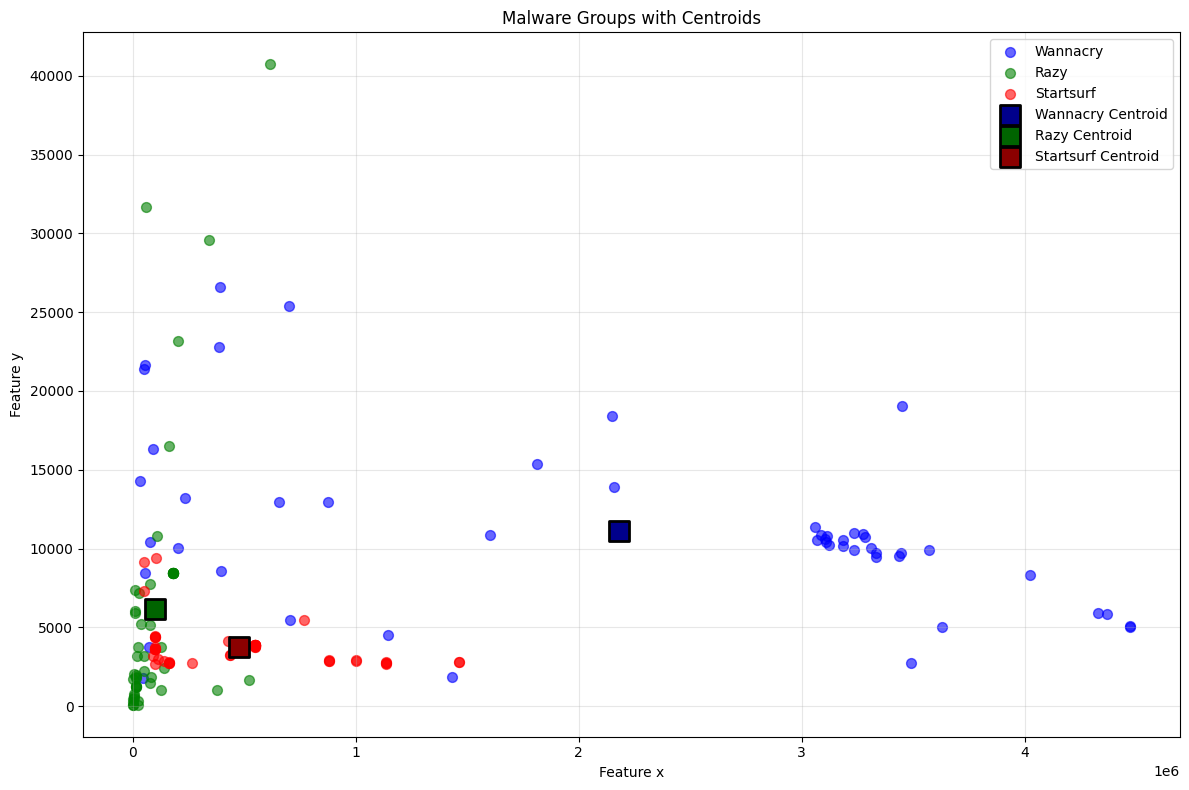

In [16]:
# ANSWER
plt.figure(figsize=(12, 8))

# Plot each group with different colors
# Wannacry group - blue color
wannacry_data = train_data[train_data['labels'] == 'wannacry']
plt.scatter(wannacry_data['x'], wannacry_data['y'],
           c='blue', alpha=0.6, label='Wannacry', s=50)

# Razy group - green color
razy_data = train_data[train_data['labels'] == 'razy']
plt.scatter(razy_data['x'], razy_data['y'],
           c='green', alpha=0.6, label='Razy', s=50)

# Startsurf group - red color
startsurf_data = train_data[train_data['labels'] == 'startsurf']
plt.scatter(startsurf_data['x'], startsurf_data['y'],
           c='red', alpha=0.6, label='Startsurf', s=50)

# Plot centroid points with different markers
plt.scatter(wannacry_centroid[0], wannacry_centroid[1],
           c='darkblue', marker='s', s=200, label='Wannacry Centroid',
           edgecolor='black', linewidth=2)

plt.scatter(razy_centroid[0], razy_centroid[1],
           c='darkgreen', marker='s', s=200, label='Razy Centroid',
           edgecolor='black', linewidth=2)

plt.scatter(startsurf_centroid[0], startsurf_centroid[1],
           c='darkred', marker='s', s=200, label='Startsurf Centroid',
           edgecolor='black', linewidth=2)

plt.xlabel('Feature x')
plt.ylabel('Feature y')
plt.title('Malware Groups with Centroids')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Question 3a: For each point in test_data, calculate the Euclidean distance between the point and each of the three centroid points

#### (3 marks)

### Question 3b: Use the closest centroid to assign membership and compare against the test data label to obtain a score of successful classifications

#### (3 marks)

*Hint: You may find the clustering activity worksheet helpful for how to approach this task, and you will likely want to answer both questions within the same for loop below.*

In [19]:
# ANSWER
import math

score = 0

# For demonstration purposes, let's print detailed output for first 3 test points
print("=== Question 3a: Distance calculations for first 3 test points ===")

for i in range(test_data.shape[0]):

    ######### Question 3a  ##########
    # Get test point coordinates
    test_x = test_data.iloc[i]['x']
    test_y = test_data.iloc[i]['y']

    # Calculate Euclidean distance to each centroid
    distance1 = math.sqrt((test_x - wannacry_centroid[0])**2 + (test_y - wannacry_centroid[1])**2)
    distance2 = math.sqrt((test_x - razy_centroid[0])**2 + (test_y - razy_centroid[1])**2)
    distance3 = math.sqrt((test_x - startsurf_centroid[0])**2 + (test_y - startsurf_centroid[1])**2)

    distances = [distance1, distance2, distance3]
    dist_labels = ['wannacry','razy', 'startsurf']

    # Print distances for first 3 points
    if i < 3:
        print(f"Point {i}: Distances to centroids = {[round(d, 2) for d in distances]}")

    ######### Question 3b ##########
    # Find the minimum distance and its corresponding label
    min_distance_index = distances.index(min(distances))
    predicted_label = dist_labels[min_distance_index]

    # Get actual label from test data
    actual_label = test_data.iloc[i]['labels']

    # Compare prediction with actual and update score
    if predicted_label == actual_label:
        score += 1

    # Print classification results for first 3 points
    if i < 3:
        print(f"Point {i}: Actual={actual_label}, Predicted={predicted_label}, Match={predicted_label==actual_label}")

print("\n=== Question 3b: Classification Results ===")
print("Score:", score)

=== Question 3a: Distance calculations for first 3 test points ===
Point 0: Distances to centroids = [703541.85, 1377620.86, 999364.16]
Point 0: Actual=wannacry, Predicted=wannacry, Match=True
Point 1: Distances to centroids = [2127918.71, 49164.7, 425377.82]
Point 1: Actual=wannacry, Predicted=razy, Match=False
Point 2: Distances to centroids = [1903912.55, 3985062.81, 3606791.03]
Point 2: Actual=wannacry, Predicted=wannacry, Match=True

=== Question 3b: Classification Results ===
Score: 63


### Question 4: Provide a final accuracy score for the performance of your "by hand" classifier

#### (1 marks)

In [20]:
#ANSWER
print(f"Score: {score} out of {test_data.shape[0]}")
print(f"Accuracy: {score/test_data.shape[0]*100:.2f}%")

Score: 63 out of 90
Accuracy: 70.00%


## Part 2: Developing a large-scale ML classifier

We will now extend the earlier principles for the full dataset. Essentially the task is the same, we want to find the parameters that allow us to clearly separate groups for classification. You will want to consult the [scikit-learn documentation](https://scikit-learn.org/stable/index.html) to answer the following questions.

### Question 5: Scale the Features DataFrame using the StandardScaler function

#### (1 mark)

*Hint: The variable **features** contains all of the numerical parameters that we will use to train our ML model, which we need to normalise using this function.*

In [27]:
# ANSWER
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the features
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)

# Verify scaling worked
print("Original features shape:", features.shape)
print("Scaled features shape:", scaled_features.shape)
print("\nOriginal features")
display(features)
print("\nScaled features")
display(scaled_features)

Original features shape: (28000, 256)
Scaled features shape: (28000, 256)

Original features


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,224862.0,15842.0,12985.0,7387.0,13132.0,5112.0,8661.0,7990.0,14978.0,5656.0,...,3714.0,2892.0,9344.0,2415.0,2742.0,3023.0,11949.0,3662.0,5552.0,77433.0
1,21802.0,2127.0,2076.0,2028.0,1871.0,1622.0,1939.0,1502.0,2133.0,1689.0,...,1664.0,1607.0,1788.0,1394.0,1327.0,1453.0,1785.0,1559.0,1755.0,4882.0
2,24407.0,11682.0,7189.0,6538.0,7687.0,6848.0,4974.0,5377.0,7049.0,11642.0,...,5795.0,6053.0,6426.0,5435.0,4961.0,5026.0,5376.0,4180.0,5685.0,5775.0
3,7132.0,461.0,647.0,371.0,581.0,269.0,646.0,262.0,243.0,165.0,...,151.0,276.0,299.0,294.0,294.0,354.0,506.0,569.0,940.0,1516.0
4,5321.0,1108.0,985.0,955.0,958.0,890.0,971.0,919.0,945.0,963.0,...,933.0,975.0,945.0,924.0,879.0,952.0,956.0,900.0,942.0,1559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,23849.0,1489.0,1573.0,2649.0,1560.0,1025.0,922.0,1020.0,1042.0,938.0,...,993.0,968.0,1165.0,1041.0,1258.0,1753.0,1203.0,958.0,1315.0,4342.0
27996,9267.0,1056.0,981.0,930.0,1573.0,819.0,879.0,1064.0,1029.0,893.0,...,998.0,911.0,990.0,1039.0,930.0,833.0,904.0,891.0,976.0,2683.0
27997,25357.0,874.0,1008.0,2781.0,1518.0,939.0,4267.0,968.0,1103.0,1032.0,...,563.0,557.0,974.0,706.0,514.0,632.0,657.0,584.0,535.0,2431.0
27998,29010.0,6476.0,2969.0,5358.0,2827.0,4598.0,2172.0,4045.0,2496.0,3718.0,...,217.0,146.0,544.0,232.0,95.0,140.0,294.0,163.0,182.0,4005.0



Scaled features


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.097820,0.672159,0.826630,0.380661,0.647650,0.204495,0.792002,0.691117,1.028243,0.432558,...,0.191715,0.044177,0.845365,-0.010620,0.038420,0.068183,1.190714,0.135741,0.178144,0.406173
1,-0.355085,-0.291567,-0.274569,-0.254820,-0.323318,-0.234858,-0.178266,-0.244002,-0.310024,-0.182924,...,-0.155188,-0.155994,-0.248598,-0.175093,-0.166129,-0.179846,-0.248456,-0.168900,-0.218099,-0.238666
2,-0.351784,0.379844,0.241558,0.279985,0.178160,0.423038,0.259812,0.314504,0.202153,1.361289,...,0.543863,0.536584,0.422895,0.475873,0.359192,0.384618,0.260011,0.210779,0.192024,-0.230729
3,-0.373671,-0.408634,-0.418818,-0.451310,-0.434547,-0.405185,-0.364900,-0.422724,-0.506936,-0.419373,...,-0.411219,-0.363332,-0.464176,-0.352293,-0.315456,-0.353466,-0.429556,-0.312311,-0.303149,-0.268583
4,-0.375965,-0.363170,-0.384699,-0.382059,-0.402040,-0.327008,-0.317989,-0.328030,-0.433797,-0.295563,...,-0.278888,-0.254445,-0.370648,-0.250806,-0.230890,-0.258994,-0.365838,-0.264363,-0.302941,-0.268201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,-0.352491,-0.336398,-0.325344,-0.181181,-0.350134,-0.310013,-0.325062,-0.313473,-0.423691,-0.299442,...,-0.268735,-0.255535,-0.338796,-0.231958,-0.176103,-0.132452,-0.330864,-0.255961,-0.264016,-0.243465
27996,-0.370966,-0.366824,-0.385103,-0.385023,-0.349013,-0.335946,-0.331268,-0.307131,-0.425046,-0.306423,...,-0.267889,-0.264414,-0.364133,-0.232280,-0.223518,-0.277794,-0.373201,-0.265666,-0.299393,-0.258211
27997,-0.350581,-0.379613,-0.382378,-0.165528,-0.353755,-0.320840,0.157763,-0.320967,-0.417336,-0.284857,...,-0.341500,-0.319559,-0.366449,-0.285923,-0.283654,-0.309548,-0.408175,-0.310138,-0.345414,-0.260450
27998,-0.345952,0.014028,-0.184426,0.140058,-0.240888,0.139788,-0.144634,0.122522,-0.272205,0.131877,...,-0.400050,-0.383582,-0.428705,-0.362280,-0.344223,-0.387274,-0.459574,-0.371125,-0.382252,-0.246461


### Question 6: Use the LabelEncoder function on the Labels variable to obtain numerical label data

#### (1 mark)

In [28]:
# ANSWER
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the labels
encoded_labels = label_encoder.fit_transform(labels['label'])

# Show label encoding mapping
print("Label Encoding Reference:")
for label_name, encoded_value in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"'{label_name}' = {encoded_value}")

# Create comparison dataframe
comparison_data = pd.DataFrame({
    'Original_Labels': labels['label'],
    'Encoded_Values': encoded_labels
})

# Show sample of the encoding results
print("\nSample of encoded labels (first 15 entries):")
print(comparison_data.head(15))

# Summary statistics
print("\nEncoding Summary:")
print(f"Total labels encoded: {len(encoded_labels)}")
print(f"Number of unique labels: {len(label_encoder.classes_)}")

Label Encoding Reference:
'bladabindi' = 0
'dealply' = 1
'emotet' = 2
'filetour' = 3
'flystudio' = 4
'gamarue' = 5
'gandcrab' = 6
'high' = 7
'razy' = 8
'startsurf' = 9
'upatre' = 10
'vittalia' = 11
'wannacry' = 12
'zbot' = 13

Sample of encoded labels (first 15 entries):
   Original_Labels  Encoded_Values
0             high               7
1             high               7
2             high               7
3             high               7
4             high               7
5             high               7
6             high               7
7             high               7
8             high               7
9             high               7
10            high               7
11            high               7
12            high               7
13            high               7
14            high               7

Encoding Summary:
Total labels encoded: 28000
Number of unique labels: 14


### Question 7: Prepare the dataset for ML testing using the Train-Test-Split function
#### (1 mark)

In [29]:
# ANSWER
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features,
    encoded_labels,
    test_size=0.2,
    random_state=42,
    stratify=encoded_labels
)

# Display dataset split information
print("Dataset split completed successfully!")
print("-" * 50)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Features per sample: {X_train.shape[1]}")

# Check distribution of labels in each set
print("\nLabel distribution in training set:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for label, count in zip(unique_train, counts_train):
    print(f"Label {label}: {count} samples")

print("\nLabel distribution in testing set:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
for label, count in zip(unique_test, counts_test):
    print(f"Label {label}: {count} samples")

Dataset split completed successfully!
--------------------------------------------------
Training set: 22400 samples
Testing set: 5600 samples
Features per sample: 256

Label distribution in training set:
Label 0: 1600 samples
Label 1: 1600 samples
Label 2: 1600 samples
Label 3: 1600 samples
Label 4: 1600 samples
Label 5: 1600 samples
Label 6: 1600 samples
Label 7: 1600 samples
Label 8: 1600 samples
Label 9: 1600 samples
Label 10: 1600 samples
Label 11: 1600 samples
Label 12: 1600 samples
Label 13: 1600 samples

Label distribution in testing set:
Label 0: 400 samples
Label 1: 400 samples
Label 2: 400 samples
Label 3: 400 samples
Label 4: 400 samples
Label 5: 400 samples
Label 6: 400 samples
Label 7: 400 samples
Label 8: 400 samples
Label 9: 400 samples
Label 10: 400 samples
Label 11: 400 samples
Label 12: 400 samples
Label 13: 400 samples


### Question 8: Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data.

#### (3 marks)


=== MLP Classifier Results ===
Training Accuracy: 0.9032 (90.32%)
Test Accuracy: 0.8273 (82.73%)
Correctly classified (test): 4633 out of 5600


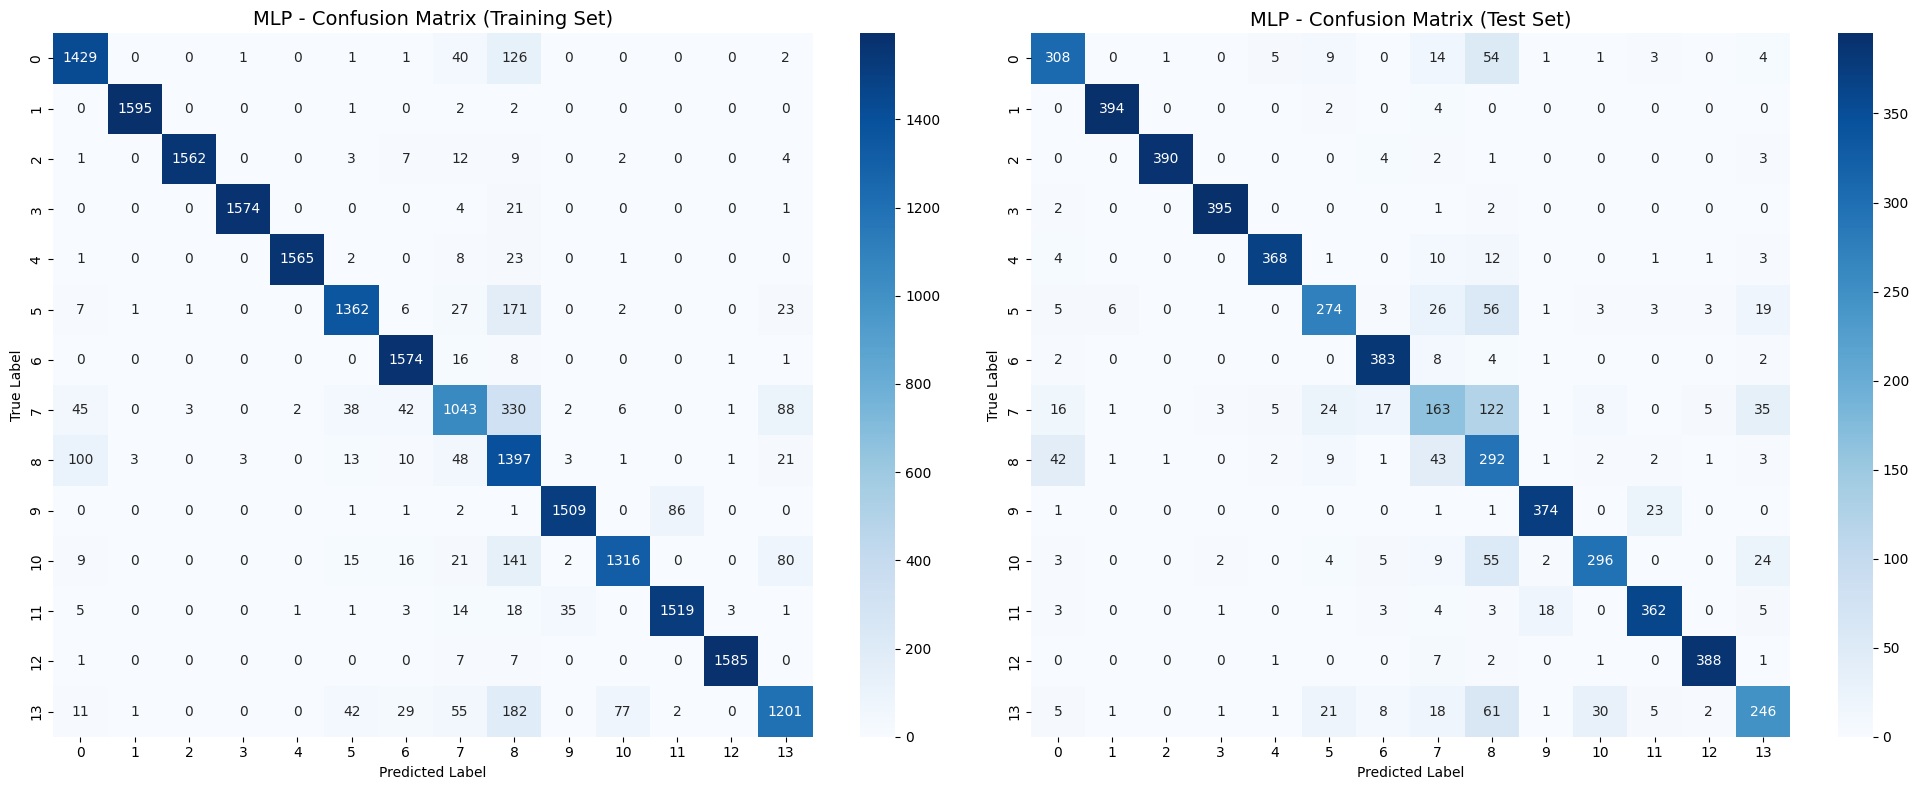


Classification Report (Test Set):
              precision    recall  f1-score   support

  bladabindi       0.79      0.77      0.78       400
     dealply       0.98      0.98      0.98       400
      emotet       0.99      0.97      0.98       400
    filetour       0.98      0.99      0.98       400
   flystudio       0.96      0.92      0.94       400
     gamarue       0.79      0.69      0.74       400
    gandcrab       0.90      0.96      0.93       400
        high       0.53      0.41      0.46       400
        razy       0.44      0.73      0.55       400
   startsurf       0.94      0.94      0.94       400
      upatre       0.87      0.74      0.80       400
    vittalia       0.91      0.91      0.91       400
    wannacry       0.97      0.97      0.97       400
        zbot       0.71      0.61      0.66       400

    accuracy                           0.83      5600
   macro avg       0.84      0.83      0.83      5600
weighted avg       0.84      0.83      0.83  

In [31]:
# ANSWER
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Initialize MLP classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=1000,
    random_state=42,
    learning_rate='adaptive'
)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions on both training and test sets
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display accuracy results
print("\n=== MLP Classifier Results ===")
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Correctly classified (test): {sum(y_test_pred == y_test)} out of {len(y_test)}")

# Confusion Matrix for both sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

# Training Set Confusion Matrix
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('MLP - Confusion Matrix (Training Set)', fontsize=14)
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# Test Set Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('MLP - Confusion Matrix (Test Set)', fontsize=14)
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Classification Report (Test Set)
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred,
                          target_names=label_encoder.classes_))
# Classification Report (Training Set)
print("\nClassification Report (Training Set):")
print(classification_report(y_train, y_train_pred,
                          target_names=label_encoder.classes_))

### Question 9: Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data.

#### (3 marks)


=== Random Forest Classifier Results ===
Training Accuracy: 1.0000 (100.00%)
Test Accuracy: 0.8798 (87.98%)
Correctly classified (test): 4927 out of 5600


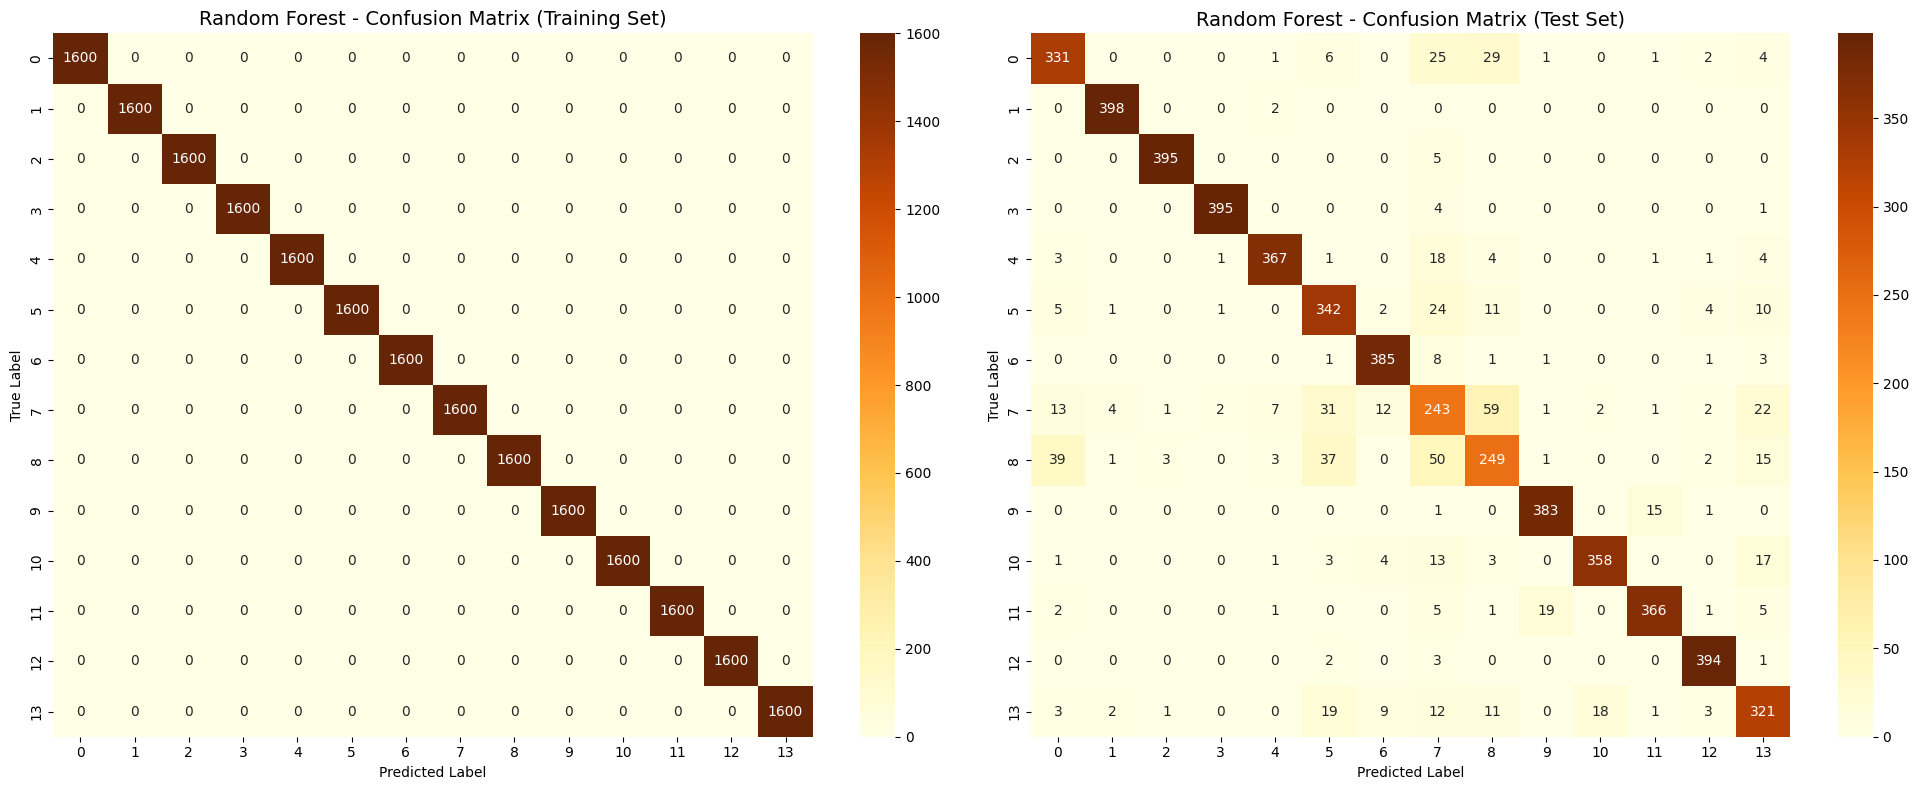


Classification Report (Training Set):
              precision    recall  f1-score   support

  bladabindi       1.00      1.00      1.00      1600
     dealply       1.00      1.00      1.00      1600
      emotet       1.00      1.00      1.00      1600
    filetour       1.00      1.00      1.00      1600
   flystudio       1.00      1.00      1.00      1600
     gamarue       1.00      1.00      1.00      1600
    gandcrab       1.00      1.00      1.00      1600
        high       1.00      1.00      1.00      1600
        razy       1.00      1.00      1.00      1600
   startsurf       1.00      1.00      1.00      1600
      upatre       1.00      1.00      1.00      1600
    vittalia       1.00      1.00      1.00      1600
    wannacry       1.00      1.00      1.00      1600
        zbot       1.00      1.00      1.00      1600

    accuracy                           1.00     22400
   macro avg       1.00      1.00      1.00     22400
weighted avg       1.00      1.00      1.

In [33]:
# ANSWER
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on both training and test sets
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Calculate accuracies
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Display accuracy results
print("\n=== Random Forest Classifier Results ===")
print(f"Training Accuracy: {train_accuracy_rf:.4f} ({train_accuracy_rf*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy_rf:.4f} ({test_accuracy_rf*100:.2f}%)")
print(f"Correctly classified (test): {sum(y_test_pred_rf == y_test)} out of {len(y_test)}")

# Confusion Matrix for both sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

# Training Set Confusion Matrix
cm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='YlOrBr', ax=ax1)
ax1.set_title('Random Forest - Confusion Matrix (Training Set)', fontsize=14)
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# Test Set Confusion Matrix
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='YlOrBr', ax=ax2)
ax2.set_title('Random Forest - Confusion Matrix (Test Set)', fontsize=14)
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Classification Report for Training Set
print("\nClassification Report (Training Set):")
print(classification_report(y_train, y_train_pred_rf,
                          target_names=label_encoder.classes_))

# Classification Report for Test Set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_rf,
                          target_names=label_encoder.classes_))

### Question 10: Describe what you believe are the key findings of this task, comparing the *by-hand* classifier with the MLP classifier. As part of your discussion, consider the volume of data in both approaches and the issues of data separability. Give justifications for your answer. Limit your response to a maximum of 300 words.

#### (10 marks).

**Answer:**

The task demonstrates major differences between how malware gets classified through manual and machine learning approaches.

Use of the manual "by-hand" classification achieved 70% accuracy when used to evaluate 90 test samples with three malware families (Wannacry, Razy, Startsurf). It relied solely on Euclidean distance to centroids in 2D space, using only two features (X, Y). The increased interpretability came at the expense of limited class discrimination capabilities since current outputs did not scale well according to distance metrics.

In contrast, larger dataset composed of 28,000 samples, 256 features and 14 malware families served for training the MLP (Multi-Layer Perceptron) model. It achieved 90.3% training and 82.7% test accuracy. The complex non-linear features learned by the MLP delivered excellent performance on every family of malware as indicated through the classification report.

The Random Forest (RF) gained superiority over the MLP by achieving 100% training accuracy along with 87.98% test accuracy. The ensemble nature of Random Forest produces resilient and highly generalized results on structured feature data which demonstrates steady precision and recall together with F1-scores measurements.

The experimental findings demonstrate the disadvantages of centroid-based classification. It functions effectively only when dealing with short dimensions alongside limited class numbers. Manual classification tools cannot handle data types that include high dimensions and imbalanced and overlapping characteristics.

On the other hand, ML models particularly MLP and RF possess effective scaling capabilities to discover meaningful patterns which remain consistent under conditions of noisy and overlapping data. However, the models may overfit because they achieved perfect training accuracy which was visible during MLP and RF evaluation.

In summary, the dramatic superiority of artificial intelligence methods stands over manual approaches in detecting malware since they both provide higher accuracy along with better scalability in typical real-world scenarios which deal with massive and complicated multiclass datasets.